In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
california = fetch_california_housing()

In [4]:
california.keys() #type: ignore

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
california.target_names #type: ignore

['MedHouseVal']

In [6]:
data = pd.DataFrame(data = california.data, columns= california.feature_names) # type: ignore
data['MedHouseVal'] = california.target # type: ignore
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
print(california.DESCR) # type: ignore

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [8]:
sns.pairplot(data)

Error in callback <function flush_figures at 0x0000026D23AA94E0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
x = data.drop(['MedHouseVal'], axis= 1)
y = data['MedHouseVal']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.score(x_test,y_test)

0.5943232652466199

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_predicted)

0.5943232652466199

In [ ]:
ytest= y_test[:200]
ypredicted = y_predicted[:200]
ytest.shape, ypredicted.shape

((200,), (200,))

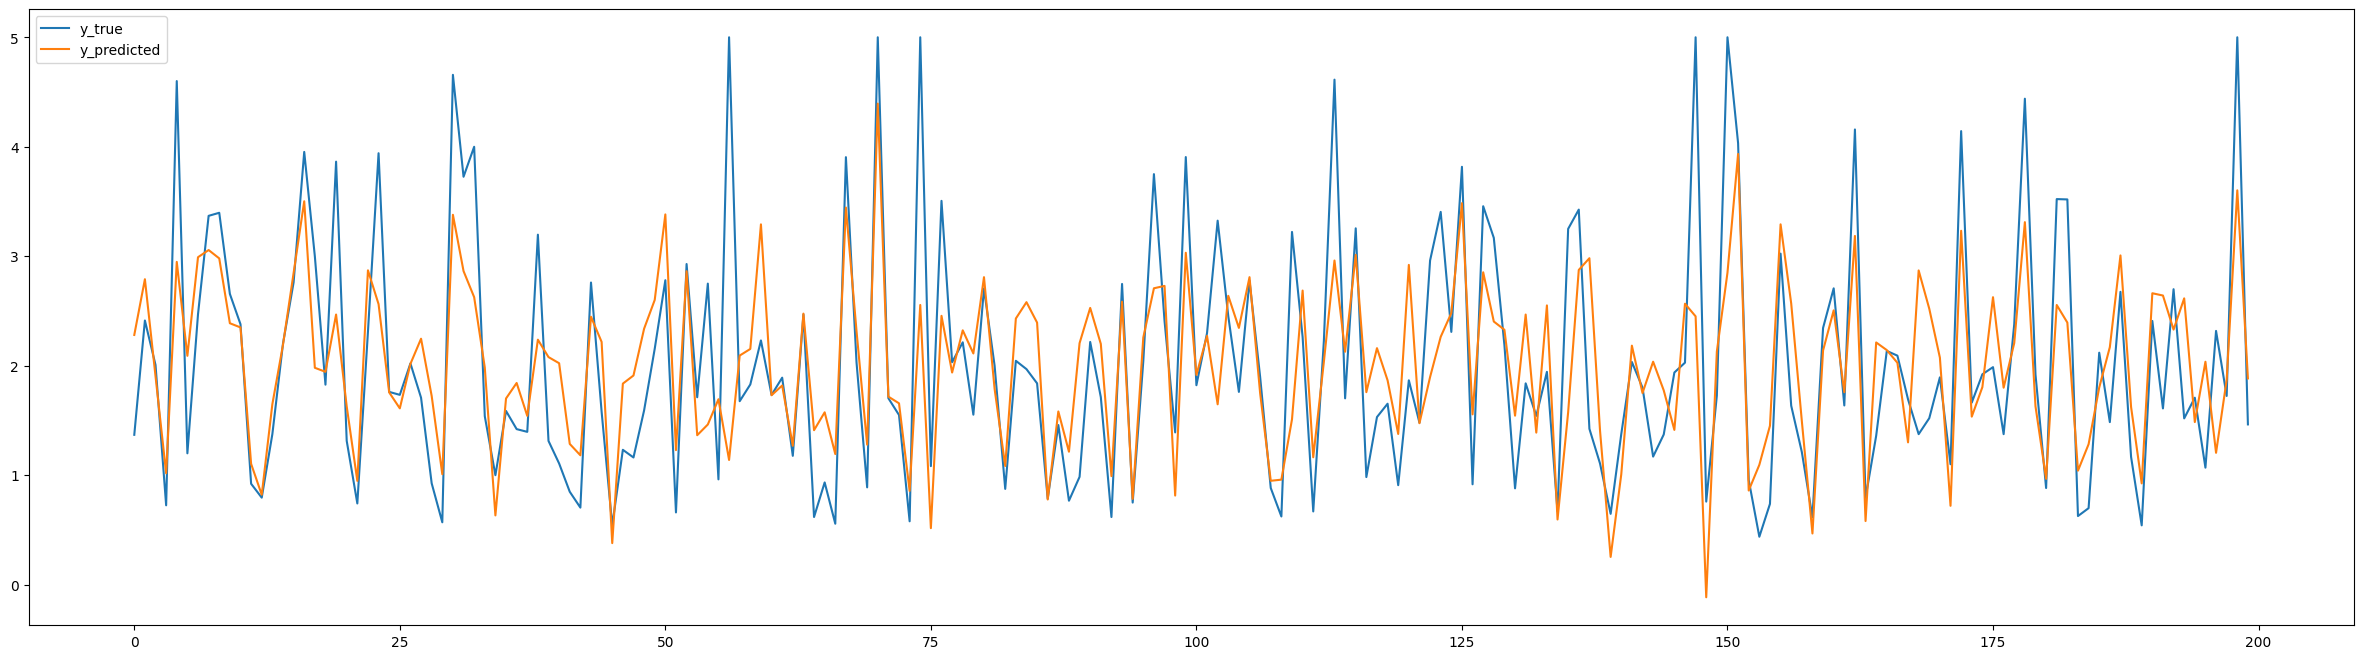

In [ ]:
plt.figure(figsize=(30,8))
x_points = list(range(len(ytest)))
plt.plot(x_points, ytest, label = 'y_true')
plt.plot(x_points, ypredicted, label= 'y_predicted')
plt.legend()
plt.show()